# Sumário 
<a id='sumario'></a>

- [Sumario](#sumario)
  - [Seção 1: Análise prévia](#secao1)
    - [Subseção 1.1. Carregamento de dados](#subsecao11)
    - [Subseção 1.2. Análise de prioridade de hipóteses](#subsecao12)
    - [Subseção 1.3. Conclusões](#subsecao13)
  - [Seção 2: Análise de dados](#secao2)
    - [Subseção 2.1. Limpeza de dados](#subsecao21)
    - [Subseção 2.2. Tarefa 1: Gráfico da receita acumulada por grupo](#subsecao22)
    - [Subseção 2.3. Tarefa 2: Gráfico do tamanho médio acumulado do pedido por grupo](#subsecao23)
    - [Subseção 2.4. Tarefa 3: Gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A](#subsecao24)
    - [Subseção 2.5. Tarefa 4: Taxa de conversão diária e diferença relativa na conversão cumulativa](#subsecao25)
    - [Subseção 2.6. Tarefa 5: Identificação de anomalias nos dados](#subsecao26)
    - [Subseção 2.7. Tarefa 6: Teste de significância estatística](#subsecao27)
    - [Subseção 2.8. Tarefa 7: Tomada de decisão](#secao28)
  - [Seção 3: Conclusões Gerais](#secao3)


- [Sumario](#sumario)
##   Análise Prévia

<a id='secao1'></a>

### Carregamento de dados 
<a id= 'subsecao-11-carregamento-de-dados'> </a>
Esta seção carrega os dados de vendas de um arquivo CSV 


In [1]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt


In [2]:

caminhoh='hypotheses_us.csv'
try:
    hipoteses=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
except:
    hipoteses=pd.read_csv(caminhoh, sep=';')

In [3]:
hipoteses['Hypothesis']

0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
5    Add a customer review page. This will increase...
6    Show banners with current offers and sales on ...
7    Add a subscription form to all the main pages....
8    Launch a promotion that gives users discounts ...
Name: Hypothesis, dtype: object

In [4]:
hipoteses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [5]:
hipoteses[['Reach','Impact','Confidence','Effort']]

,Reach,Impact,Confidence,Effort
0,3,10,8,6
1,2,5,4,10
2,8,3,7,3
3,8,3,3,8
4,3,1,1,1
5,3,2,2,3
6,5,3,8,3
7,10,7,8,5
8,1,9,9,5


###  Análise de prioridade de hipóteses 
<a class="" id='subsecao12'></a>




<font color='blue'> esta seção analisa qual hipotese seria mais benéfica de se priorisar segundo aplicação dos calculos de ICE e RICE


In [6]:
#RICE = Reach*Impact * Confidence /Effort
#ICE = Impact * Confidence /Effort
hipoteses['ICE']=hipoteses['Impact']*hipoteses['Confidence']/hipoteses['Effort']
hipoteses['RICE']=hipoteses['Impact']*hipoteses['Reach']*hipoteses['Confidence']/hipoteses['Effort']    
print(hipoteses.sort_values(by='RICE')[['Hypothesis','RICE']])
print(hipoteses.sort_values(by='ICE')[['Hypothesis','ICE']])

                                          Hypothesis   RICE
4  Change the background color on the main page. ...    3.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
3  Change the category structure. This will incre...    9.0
8  Launch a promotion that gives users discounts ...   16.2
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
2  Add product recommendation blocks to the store...   56.0
7  Add a subscription form to all the main pages....  112.0
                                          Hypothesis        ICE
4  Change the background color on the main page. ...   1.000000
3  Change the category structure. This will incre...   1.125000
5  Add a customer review page. This will increase...   1.333333
1  Launch your own delivery service. This will sh...   2.000000
2  Add product recommendation blocks to the store...   7.000000
6  Show banners 

In [7]:
#atribui-se IDs às hipoteses para melhor trabalhar a análise 
hipoteses['Hypothesis']= np.arange(9)+1


In [8]:
hipoteses.sort_values(by='ICE', ascending=False)


,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,9,1,9,9,5,16.200000,16.2
0,1,3,10,8,6,13.333333,40.0
7,8,10,7,8,5,11.200000,112.0
6,7,5,3,8,3,8.000000,40.0
2,3,8,3,7,3,7.000000,56.0
1,2,2,5,4,10,2.000000,4.0
5,6,3,2,2,3,1.333333,4.0
3,4,8,3,3,8,1.125000,9.0
4,5,3,1,1,1,1.000000,3.0


In [9]:
hipoteses.sort_values(by='RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,8,10,7,8,5,11.200000,112.0
2,3,8,3,7,3,7.000000,56.0
0,1,3,10,8,6,13.333333,40.0
6,7,5,3,8,3,8.000000,40.0
8,9,1,9,9,5,16.200000,16.2
3,4,8,3,3,8,1.125000,9.0
1,2,2,5,4,10,2.000000,4.0
5,6,3,2,2,3,1.333333,4.0
4,5,3,1,1,1,1.000000,3.0


###  Conclusões <a class="" id='subseção-13-conclusões'></a>



<font color="green">como percebemos, as hipoteses 8 , 3 e 1* são as melhores quando avaliamos o RICE.  
Por outro lado, se formos avaliar apenas o ICE, agora são as hipoteses 9, 1 e 8* que se destacam.  
Tudo isso nos revela que o alcance (reach) (que é a unica variavel responsavel pela diferença) varia significativamente.  
Isso influencia positivamente as hipoteses 8 e 3, que ganham posições.  
Entretando o alcance da 1ª e da 9ª hipotese são bem mais baixas comparativamente. </font>


<details>
<summary>
    <b>*as hipoteses são as seguintes ↓</b>
</summary>
<font color="gray">
    
1-Add two new channels for attracting traffic. This will bring 30% more users

2-Launch your own delivery service. This will shorten delivery time

3-Add product recommendation blocks to the store's site. This will increase conversion and average purchase size

4-Change the category structure. This will increase conversion since users will find the products they want more quickly

5-Change the background color on the main page. This will increase user engagement

6-Add a customer review page. This will increase the number of orders

7-Show banners with current offers and sales on the main page. This will boost conversion

8-Add a subscription form to all the main pages. This will help you compile a mailing list

9-Launch a promotion that gives users discounts on their birthdays
    
</font>
</details>


<details>
    <summary>
    <b>**em português ↓ </b>
</summary>


<font color="green">
    
1-Adicione dois novos canais para atrair tráfego. Isso trará 30% mais usuários

2-Lance seu próprio serviço de delivery. Isso reduzirá o tempo de entrega

3-Adicione blocos de recomendação de produtos ao site da loja. Isso aumentará a conversão e o tamanho médio da compra

4-Altere a estrutura da categoria. Isso aumentará a conversão, pois os usuários encontrarão os produtos que desejam mais rapidamente

5-Altere a cor de fundo da página principal. Isso aumentará o envolvimento do usuário

6-Adicione uma página de avaliação do cliente. Isso aumentará o número de pedidos

7-Mostre banners com ofertas e promoções atuais na página principal. Isso aumentará a conversão

8-Adicione um formulário de inscrição a todas as páginas principais. Isso ajudará você a compilar uma lista de discussão

9-Lance uma promoção que dê descontos aos usuários em seus aniversários</font>
</details>

- [Sumario](#sumario)
## Análise de dados 
<a id='secao2'></a>



In [10]:
caminhop='orders_us.csv'
try:
    pedidos=pd.read_csv('/datasets/orders_us.csv')
except:
    pedidos=pd.read_csv(caminhop)


In [11]:
caminhov='visits_us.csv'
try:
    visitas=pd.read_csv('/datasets/visits_us.csv')
except:
    visitas=pd.read_csv(caminhov)
    

- [Sumario](#sumario)
###  Limpeza de dados 
<a  id='subsecao21'></a>



In [12]:
#tirando duplicadas e passando para datetime
pedidos=pedidos.drop_duplicates()
visitas = visitas.drop_duplicates()

In [13]:
visitas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitas['date'] = pd.to_datetime(visitas['date'])

In [15]:
pedidos.info()
pedidos['date'] = pd.to_datetime(pedidos['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


<font color='gray'> alguns clientes participaram tanto do grupo A, quanto do B, temos que retirá-los da análise para não haver contaminação</font>

In [16]:

idsA=pedidos[pedidos['group']=='A']
idsB=pedidos[pedidos['group']=='B']
pedidosduplosA=idsA[idsA['visitorId'].isin(idsB['visitorId'])]
pedidosduplosB=idsB[idsB['visitorId'].isin(idsA['visitorId'])]


In [17]:
pedidosduplos=pd.concat([pedidosduplosA, pedidosduplosB])
pedidosduplos.sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,165.7,B
703,4293855558,8300375,2019-08-07,30.5,A
1102,1941707234,199603092,2019-08-12,100.0,A
26,2223239646,199603092,2019-08-15,55.7,A
246,437656952,199603092,2019-08-02,55.7,B
...,...,...,...,...,...
873,2519737434,4256040402,2019-08-08,900.7,B
588,3700356838,4256040402,2019-08-20,275.5,A
253,1610091760,4256040402,2019-08-23,265.8,A
682,1216533772,4266935830,2019-08-29,1220.2,B


In [18]:
pedidoslimpo = pedidos[~pedidos['visitorId'].isin(pedidosduplos['visitorId'])].reset_index()
pedidoslimpo

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,255.7,B
1012,1192,2662137336,3733762160,2019-08-14,100.8,B
1013,1193,2203539145,370388673,2019-08-14,50.1,A
1014,1194,1807773912,573423106,2019-08-14,165.3,A


<font color='gray'> agora calculamos quantas visitas e pedidos houve, com o passar dos dias, de forma acumulad .
para tanto, aplicamos nunique() aos visitantes(visitorId)e às compras(transactionId) bem como sum() à receita(revenue), conforme se ve:.

In [19]:
visitas

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [20]:
pedidoslimpo

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,255.7,B
1012,1192,2662137336,3733762160,2019-08-14,100.8,B
1013,1193,2203539145,370388673,2019-08-14,50.1,A
1014,1194,1807773912,573423106,2019-08-14,165.3,A


In [21]:
visitasAcumulada = pedidoslimpo.apply(lambda x: visitas[np.logical_and(visitas['date'] <= x['date'], visitas['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitasAcumulada=visitasAcumulada.drop_duplicates()

In [22]:
comprasAcumulada=pedidoslimpo.apply(lambda x: pedidoslimpo[np.logical_and(pedidoslimpo['date'] <= x['date'], pedidoslimpo['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
comprasAcumulada=comprasAcumulada.drop_duplicates()

In [23]:
visitasAcumulada

,date,group,visits
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845
...,...,...,...
456,2019-08-29,B,17708
645,2019-08-30,A,18037
589,2019-08-30,B,18198
820,2019-08-31,A,18736


In [24]:
visitasAcumulada.columns

Index(['date', 'group', 'visits'], dtype='object')

In [25]:
comprasAcumulada.columns

Index(['date', 'group', 'transactionId', 'visitorId', 'revenue'], dtype='object')

agora que temos os dados das compras e das visitas, será comodo juntá-los em uma mesma tabela:

In [26]:
dadosAcumulados = comprasAcumulada.merge(visitasAcumulada, left_on=['date', 'group'], right_on=['date', 'group'])
dadosAcumulados.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
dadosAcumulados

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736


###  Tarefa 1: Gráfico da receita acumulada por grupo <a class="" id='subsecao22'></a>


<font color='blue'>1. Vamos fazer um gráfico da receita acumulada por grupo. 

In [27]:
comprasAcumulada

,date,group,transactionId,visitorId,revenue
45,2019-08-01,A,23,19,2266.6
54,2019-08-01,B,17,17,967.2
149,2019-08-02,A,42,36,3734.9
147,2019-08-02,B,40,39,3535.3
245,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
456,2019-08-29,B,510,490,74576.7
645,2019-08-30,A,460,437,52363.7
589,2019-08-30,B,531,511,77863.5
820,2019-08-31,A,468,445,53212.0


temos que separar os dados por grupo, depois plotar em grafico

In [28]:
comprasAcumuladaA=comprasAcumulada[comprasAcumulada['group']=='A']


In [29]:
comprasAcumuladaB=comprasAcumulada[comprasAcumulada['group']=='B']


<Figure size 640x480 with 0 Axes>

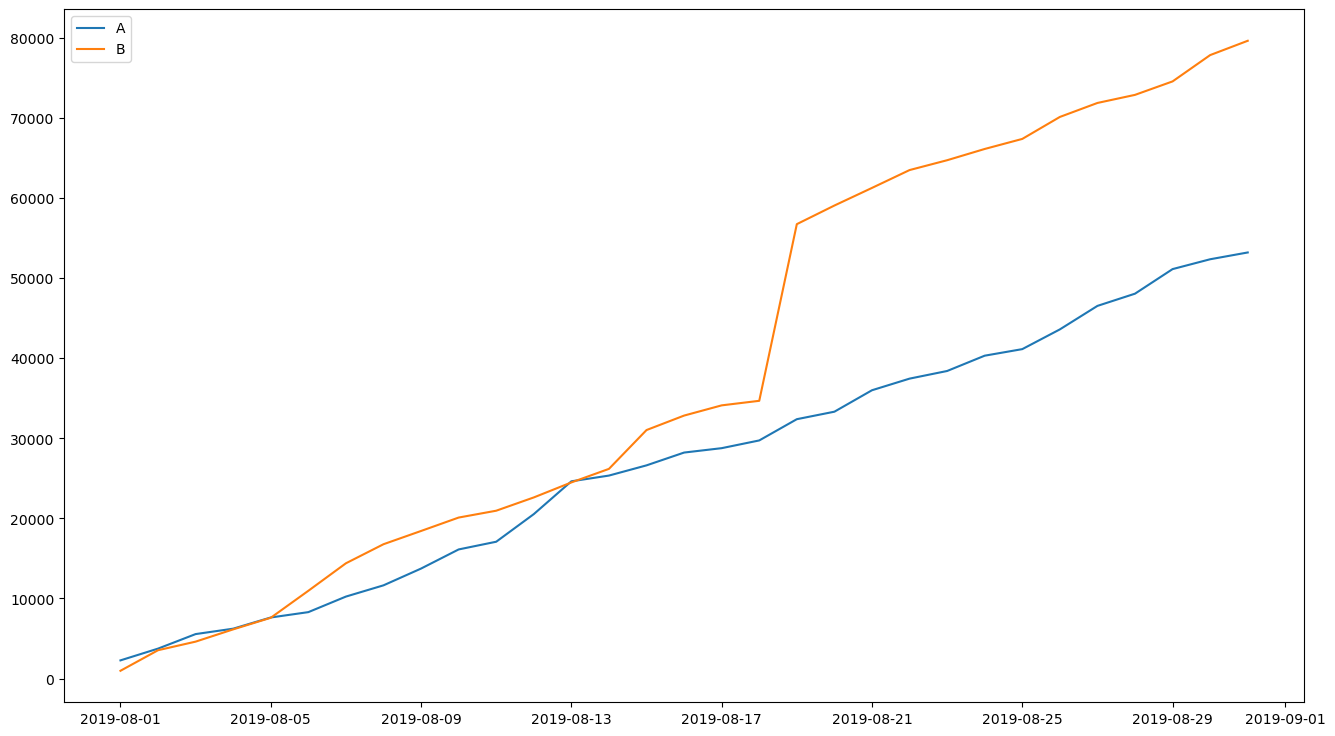

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(16, 9))
plt.plot(comprasAcumuladaA['date'], comprasAcumuladaA['revenue'], label='A')
plt.plot(comprasAcumuladaB['date'], comprasAcumuladaB['revenue'], label='B')
plt.legend()
plt.figure()



<font color='blue'> 2. conclusões e conjecturas.

<font color='green'>concluo que o grupo B apresentou visivelmente mais resultado, porem pode ser devido a uma grande flutuação do dia 18, causada por outliers 


### Subseção 2.3: Tarefa 2: Gráfico do tamanho médio(da compra) acumulado do pedido por grupo 
<a class="" id='subseção-23'></a>



<font color='blue'>1. Fazer um gráfico do tamanho médio acumulado do pedido por grupo. 

<Figure size 640x480 with 0 Axes>

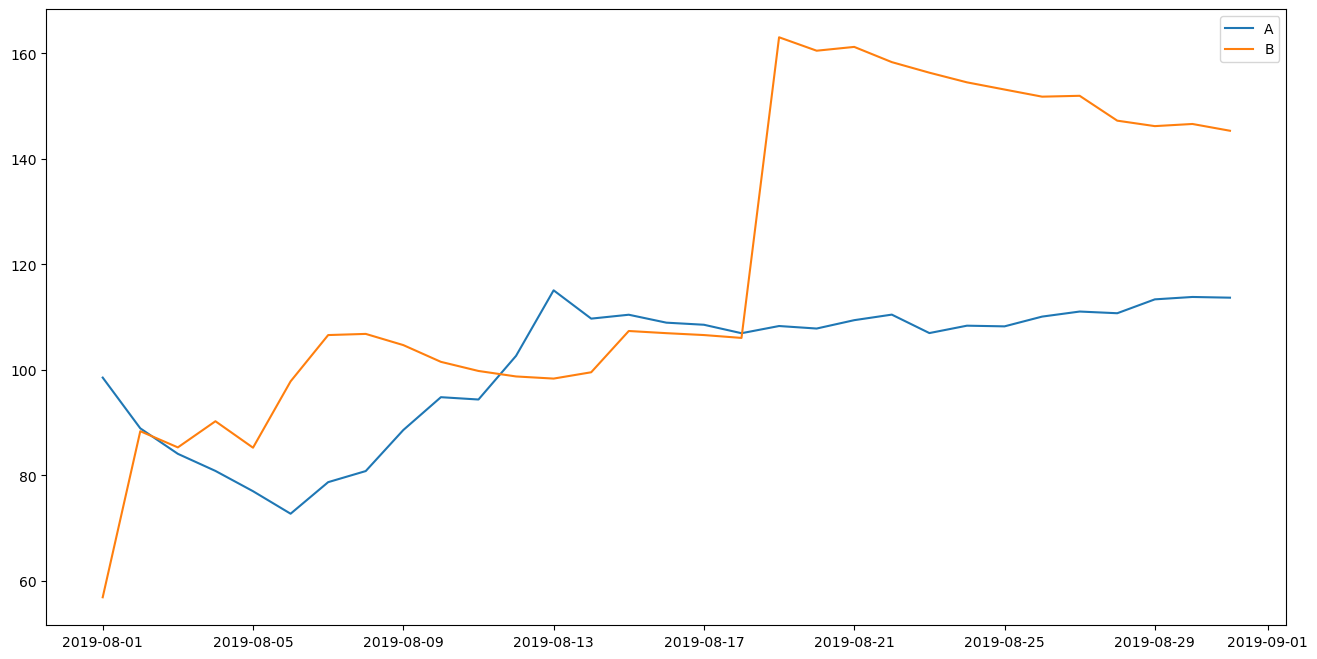

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(16,8))
plt.plot(comprasAcumuladaA['date'], comprasAcumuladaA['revenue']/comprasAcumuladaA['transactionId'], label='A')
plt.plot(comprasAcumuladaB['date'], comprasAcumuladaB['revenue']/comprasAcumuladaB['transactionId'], label='B')
plt.legend()
plt.figure()

<font color='blue'>2.  conclusões e conjecturas.

<font color='green'>percebe-se que, de fato, a grande diferença de receita total se deve a abrupta alta de valor medio de vendas no dia 18 de ago, o que provavelmente se deve a outliers, é o que se investigará!

### Subseção 2.4: Tarefa 3: Gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A 
<a class="" id='secao24'></a>




<font color='blue'>1. Fazer um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A.


<font color='gray'>para tanto, uniremos novamente os dados dos grupos A e B em uma tabela, mas agora em colunas apartadas, ou seja, cada coluna se refere a apenas um grupo

In [32]:

comprasAcumulada.columns=[['data','grupo','compras','clientes','receita']]

In [33]:
comprasacumuladasjuntas = comprasAcumuladaA.merge(comprasAcumuladaB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
comprasacumuladasjuntas.columns

Index(['date', 'groupA', 'transactionIdA', 'visitorIdA', 'revenueA', 'groupB',
       'transactionIdB', 'visitorIdB', 'revenueB'],
      dtype='object')

agora é so plotar o grafico

<Figure size 640x480 with 0 Axes>

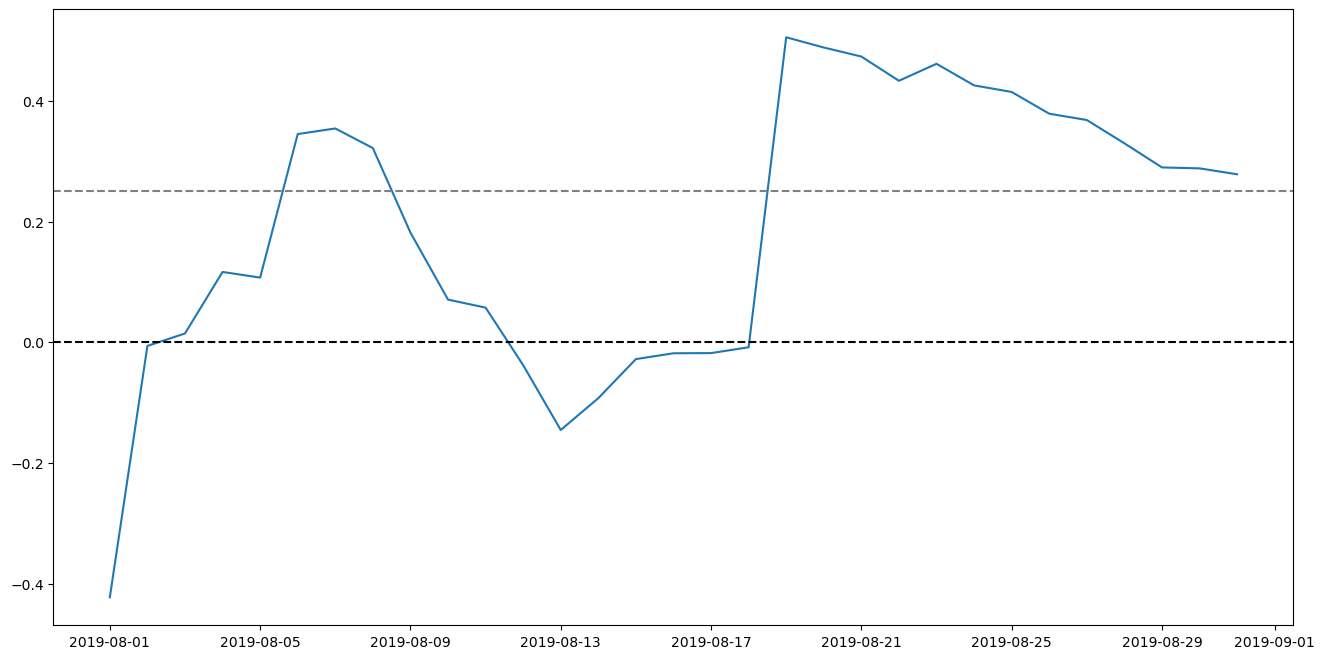

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(16,8))
plt.plot(comprasacumuladasjuntas['date'], (comprasacumuladasjuntas['revenueB']/comprasacumuladasjuntas['transactionIdB'])/(comprasacumuladasjuntas['revenueA']/comprasacumuladasjuntas['transactionIdA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='gray', linestyle='--')

plt.figure()



<font color='blue'>2. conclusões e conjecturas.

<font color='green'>Em vários pontos, a diferença entre os segmentos apresenta picos. 
Isso indica a ocorrência de pedidos grandes e valores atípicos! Vamos encontrá-los depois. Destaco o dia 18.

### Subseção 2.5: Tarefa 4: Taxa de conversão diária e diferença relativa na conversão cumulativa 
<a class="" id='subsecao25'></a>



<font color='blue'>1. Calcular a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia.

<font color='gray'>repetimos o procedimento de forma semelhante, 
dividindo a tabela nos grupos A e B, para obter os valores da taxa de conversao acumulada, para cada grupo.

In [35]:
# calculando a conversão cumulativa
dadosAcumuladosA=dadosAcumulados[dadosAcumulados['group']=='A']
dadosAcumuladosB=dadosAcumulados[dadosAcumulados['group']=='B']

In [36]:
dadosAcumuladosA.columns

Index(['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'], dtype='object')

In [37]:
dadosAcumuladosA.loc[:,'conversao'] = dadosAcumuladosA.loc[:,'orders']/dadosAcumuladosA.loc[:,'visitors']
dadosAcumuladosB.loc[:,'conversao'] = dadosAcumuladosB.loc[:,'orders']/dadosAcumuladosB.loc[:,'visitors']

C:\Users\Nair Corso\AppData\Local\Temp\ipykernel_14148\2808321200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAcumuladosA.loc[:,'conversao'] = dadosAcumuladosA.loc[:,'orders']/dadosAcumuladosA.loc[:,'visitors']
C:\Users\Nair Corso\AppData\Local\Temp\ipykernel_14148\2808321200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAcumuladosB.loc[:,'conversao'] = dadosAcumuladosB.loc[:,'orders']/dadosAcumuladosB.loc[:,'visitors']


In [38]:
dadosAcumuladosA.columns

Index(['date', 'group', 'orders', 'buyers', 'revenue', 'visitors',
       'conversao'],
      dtype='object')

<font color='blue'>2. Traçar as taxas de conversão diárias dos dois grupos e descrever a diferença.

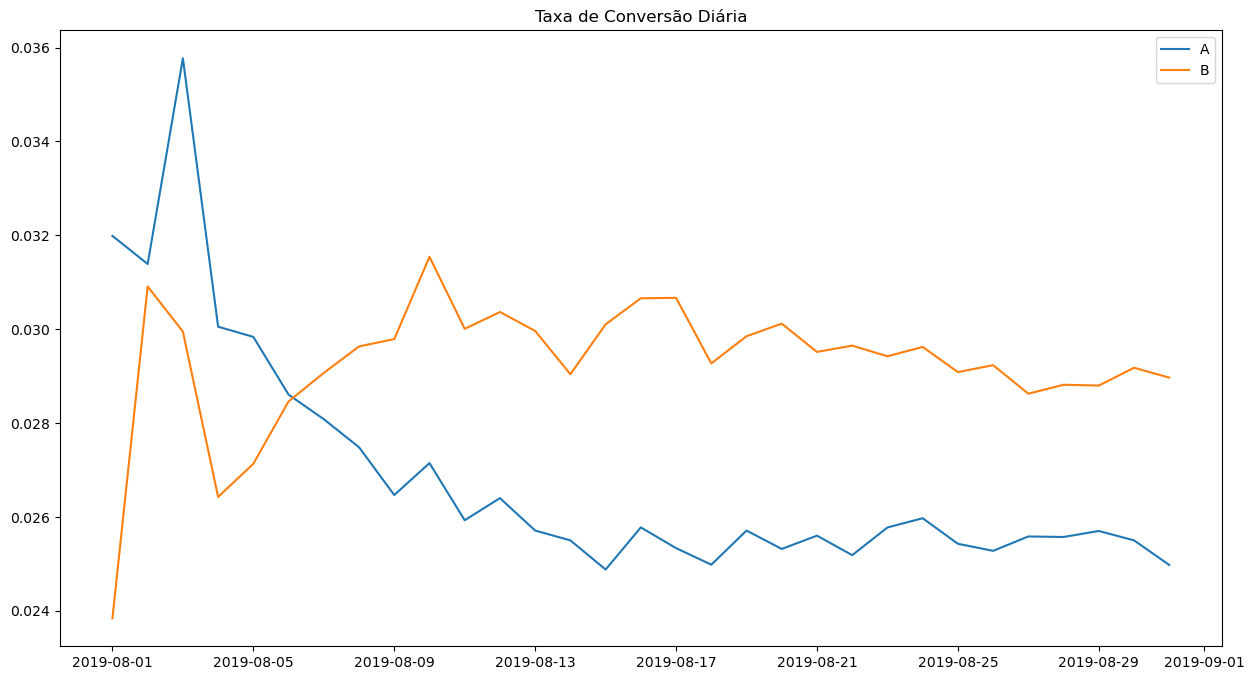

In [39]:
# construindo os gráficos
plt.figure(figsize=(15,8))
plt.plot(dadosAcumuladosA['date'], dadosAcumuladosA['conversao'], label='A')
plt.plot(dadosAcumuladosA['date'], dadosAcumuladosB['conversao'], label='B')
plt.title('Taxa de Conversão Diária')

plt.legend()

<font color='green'>percebe-se que o Grupo B alcançou visivelmente mais conversão de visitas em compras do que o grupo A

<font color='blue'>3. Fazer um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A.

a conversão relativa segue a formula: 
conversao_retaliva= (B/A) - 1

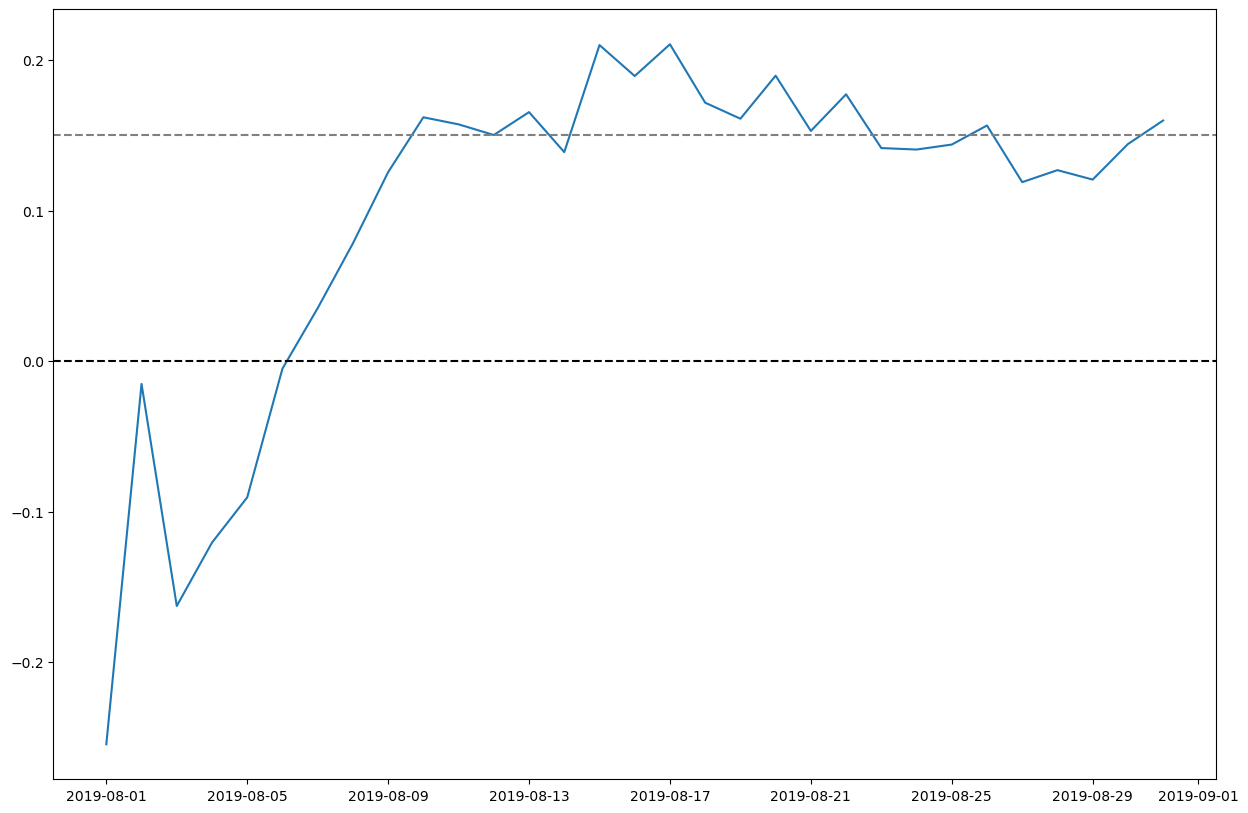

In [40]:
mergedCumulativeConversions = dadosAcumuladosA[['date','conversao']].merge(dadosAcumuladosB[['date','conversao']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversaoB']/mergedCumulativeConversions['conversaoA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

<font color='blue'>4. Tirar conclusões e criar conjecturas.

<font color='green'>a conversão do grupo B foi notoriamente maior, entretanto vemos alguns picos, o que pode ser em razãoo de outliers

### Subseção 2.6: Tarefa 5: Identificação de anomalias nos dados 
<a class="" id='subsecao26'></a>



<font color='blue'>1. Calcular os percentis 95 e 99 para o número de pedidos por usuário.

In [41]:
ordersByUsers=pedidoslimpo.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index().sort_values(by='transactionId',ascending=False)

ordersByUsers.columns = ['userId', 'orders']

print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


<font color='blue'>2. Definir o ponto em que um ponto de dados se torna uma anomalia.</font>

acima de 2 será considerado anormal

In [42]:
pedidosPorUsuariosAnormal=3

<font color='blue'>3. Fazer um gráfico de dispersão dos preços dos pedidos.</font>

aqui um grafico de caixa e bigode seria bom também

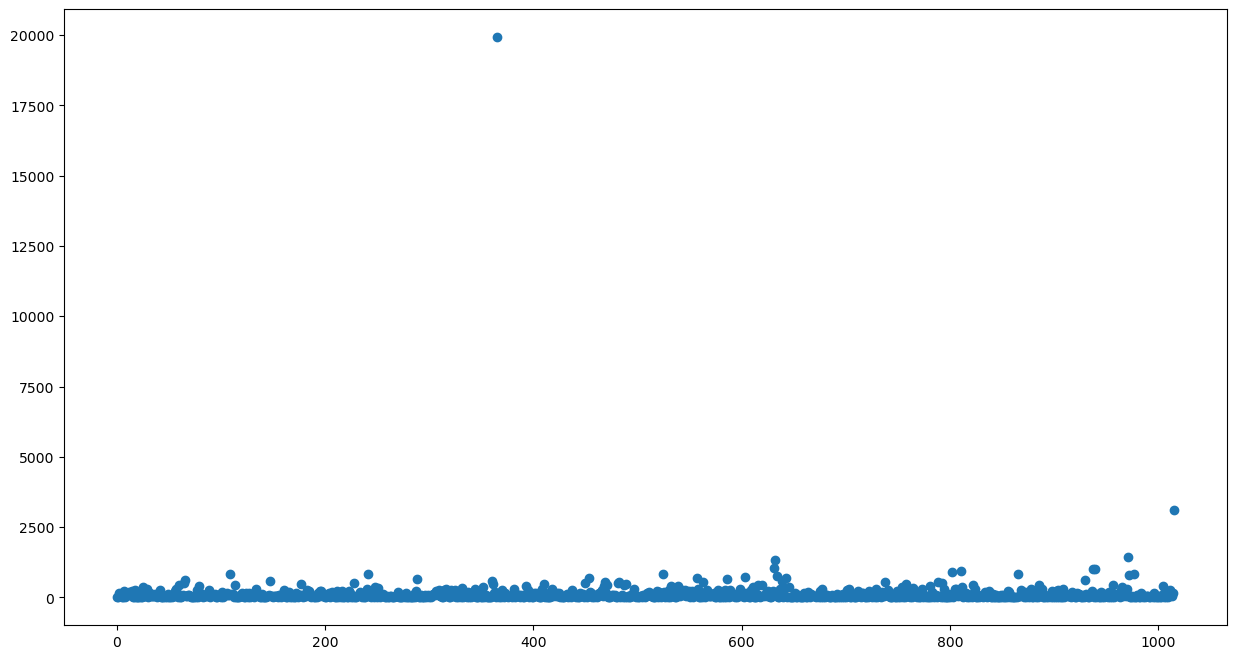

In [43]:
plt.figure(figsize=(15,8))

x_values = pd.Series(range(0,len(pedidoslimpo)))

plt.scatter(x_values, pedidoslimpo['revenue']) 

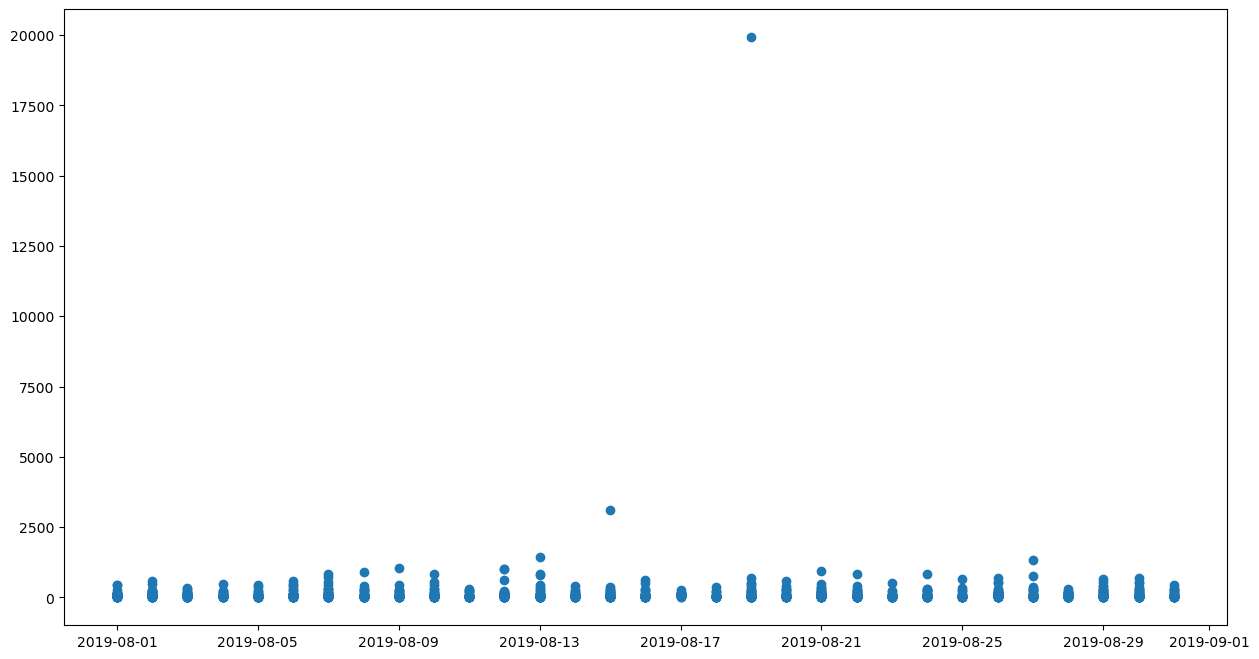

In [44]:
plt.figure(figsize=(15,8))
plt.scatter(pedidoslimpo['date'],pedidoslimpo['revenue'])

<font color='blue'>4. Calcular os percentis 95 e 99 dos preços dos pedidos.

In [45]:
print('os percentis 95 e 99 dos preços dos pedidos: ', np.percentile(pedidoslimpo['revenue'], [95, 99])) 


os percentis 95 e 99 dos preços dos pedidos:  [414.275 830.3  ]


In [46]:

media = np.mean(pedidoslimpo['revenue'])
desvio_padrao = np.std(pedidoslimpo['revenue'])


limite_superior = media + 3 * desvio_padrao
limite_inferior = media - 3 * desvio_padrao
print(limite_superior)

2074.0532502254496


<font color='blue'>5. Definir o ponto em que um ponto de dados se torna uma anomalia.</font>

<font color='green'>pelo critério de 3 vezes o desvio padrão temos 2074, mas pelo criterio dos percentis, é razoavel escolher 800, pois quasse 99% da população estará dentro do padrão.


In [47]:
precoanormal=800

[Sumário](#sumario)
### Subseção 2.7: Tarefa 6: Teste de significância estatística <a id='subsecao27'></a>


<font color='green'>Hipotese nula: ambas as amostras (grupo A e grupo B) são estatisticamente iguais
    
<font color='red'>Hipotese alternativa: um grupo desempenhou melhor que outro  

<font color='blue'>1. Encontrar a significância estatística da **diferença na conversão** entre os grupos usando os **dados brutos**.</font>

In [48]:
import scipy.stats as stats
ordersByUsersA = pedidoslimpo[pedidoslimpo['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = pedidoslimpo[pedidoslimpo['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

<font color='gray'>aqui a gente considera que o numero excedente de visitas, foi de usuarios que nada compraram, portanto, uma vez que trabalhamos com dados que não tem os ids das visitas(apenas os das compras), temos que adicionar ao dataframe usuarios ficticios que visitaram e nada compraram.


In [49]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [50]:
print(" p-values da conversão entre os grupos com dados brutos: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print(" relação das medias da conversão entre os grupos com dados brutos: {0:.5f}".format(sampleB.mean()/sampleA.mean()-1))

 p-values da conversão entre os grupos com dados brutos: 0.01102
 relação das medias da conversão entre os grupos com dados brutos: 0.15980


<font color='green'>A primeira linha do resultado nos dá o valor-p, 0.011, que é bem menor que 0.05. Então, podemos rejeitar a hipótese nula (de que não há diferença estatística significativa na conversão entre os grupos). O grupo B foi 16% (melhor que o A).

<font color='blue'>2. Encontrar a significância estatística da **diferença no tamanho médio do pedido** entre os grupos usando os **dados brutos**.</font>

In [51]:
print('p-value dos volume médio de pedidos dos dados brutos: {0:.3f}'.format(stats.mannwhitneyu(pedidoslimpo[pedidoslimpo['group']=='A']['revenue'], pedidoslimpo[pedidoslimpo['group']=='B']['revenue'])[1]))
print('relaçãodas medias do volume médio de pedidos dos dados brutos: {0:.3f}'.format(pedidoslimpo[pedidoslimpo['group']=='B']['revenue'].mean()/pedidoslimpo[pedidoslimpo['group']=='A']['revenue'].mean()-1)) 

p-value dos volume médio de pedidos dos dados brutos: 0.862
relaçãodas medias do volume médio de pedidos dos dados brutos: 0.278


<font color='green'>O valor-p é muito maior do que 0.05, então não há motivo para rejeitar a hipótese nula e concluir que o volume médio de pedidos seria diferente entre os grupos.
O volume médio de pedidos do grupo B é muito maior do que o do grupo A.

<font color='blue'>3. Encontrar a significância estatística  da **diferença na conversão** entre os grupos usando os **dados filtrados**.</font>

In [52]:
pedidoslimpo.columns

Index(['index', 'transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [53]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = pedidoslimpo[pedidoslimpo['revenue'] > 800]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 


937    148427295
33     249864742
58     611059232
972    759473111
811    887908475
dtype: int64
(22,)


In [54]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitas[visitas['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

<font color='gray'>sem filtro:

<font color='gray'>dado bruto:

In [55]:
print("p-value:","{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("relação","{0:.5f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.01102
relação 0.15980


<font color='gray'>dado sem outliers:

In [56]:
print("p-value da diferença na conversão dados filtrados: ","{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("relação das medias da diferença na conversão dados filtrados: ","{0:.5f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value da diferença na conversão dados filtrados:  0.00561
relação das medias da diferença na conversão dados filtrados:  0.19803


<font color='blue'>4. Encontrar a significância estatística da diferença no **tamanho médio do pedido** entre os grupos usando os **dados filtrados**.</font>

<font color='gray'>dados bruto:

In [57]:
print("p-value do tamanho médio do pedido (dados brutos): ",'{0:.3f}'.format(stats.mannwhitneyu(pedidoslimpo[pedidoslimpo['group']=='A']['revenue'], pedidoslimpo[pedidoslimpo['group']=='B']['revenue'])[1]))
print("relação das medias do tamanho médio do pedido (dados brutos): ",'{0:.3f}'.format(pedidoslimpo[pedidoslimpo['group']=='B']['revenue'].mean()/pedidoslimpo[pedidoslimpo['group']=='A']['revenue'].mean()-1)) 

p-value do tamanho médio do pedido (dados brutos):  0.862
relação das medias do tamanho médio do pedido (dados brutos):  0.278


<font color='gray'>dado sem outliers:

In [58]:
print("p-value do tamanho médio do pedido (dados filtrados): ",'{0:.3f}'.format(stats.mannwhitneyu(
    pedidoslimpo[np.logical_and(
        pedidoslimpo['group']=='A',
        np.logical_not(pedidoslimpo['visitorId'].isin(abnormalUsers)))]['revenue'],
    pedidoslimpo[np.logical_and(
        pedidoslimpo['group']=='B',
        np.logical_not(pedidoslimpo['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("relação das medias do tamanho médio do pedido (dados filtrados)",'{0:.3f}'.format(
    pedidoslimpo[np.logical_and(pedidoslimpo['group']=='B',np.logical_not(pedidoslimpo['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    pedidoslimpo[np.logical_and(
        pedidoslimpo['group']=='A',
        np.logical_not(pedidoslimpo['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value do tamanho médio do pedido (dados filtrados):  0.975
relação das medias do tamanho médio do pedido (dados filtrados) 0.010


<font color='gray'>media sem outliers:

In [59]:
print("media volume de compra grupo B",pedidoslimpo[np.logical_and(
        pedidoslimpo['group']=='B',
        np.logical_not(pedidoslimpo['visitorId'].isin(abnormalUsers)))]['revenue'].mean())
print("media volume de compra grupo A",pedidoslimpo[np.logical_and(
        pedidoslimpo['group']=='A',
        np.logical_not(pedidoslimpo['visitorId'].isin(abnormalUsers)))]['revenue'].mean())

media volume de compra grupo B 96.91473880597016
media volume de compra grupo A 95.94920993227991


<font color='blue'>5. Tirar conclusões e criar conjecturas.</font>

<font color='green'>Conclui-se que os dados filtrados demonstram nitidamente que houve mais conversão em compras com o grupo B. Podemos rejeitar a hipotese nula de que A e B são iguais estatisticamente. Além disso, não há qualquer indicio de que houve variação significativa quanto ao volume médio de cada compra.



### Subseção 2.8: Tarefa 7: Tomada de decisão 

<a class="" id='secao28'></a>



<font color='blue'> Decidir com base nos resultados do teste. 
As decisões possíveis são: 
1. Pare o teste, considere um dos grupos o líder. 
2. Pare o teste, conclua que não há diferença entre os grupos. 
3. Continue o teste.

- [Sumário](#sumario)

## Seção 3: Conclusões Gerais 
<a class="" id='secao3'></a>

<font color='green'> Analisando, conclui-se pela possibilidade de parar o teste e considerar o grupo B mais eficaz em converter visitantes para clientes.